In [1]:
import pandas as pd

In [2]:
data = pd.read_csv('/Users/januaralfiansyah/Documents/SKRIPSI_2/codingan/data_set/ds20.csv')
data.head()

,Tahun,Bulan,tgl,temp7,temp13,temp18,temp_avg,temp_24,temp_max,temp_min,...,press,humid7,humid13,humid18,humid_avg,humid_24,ws_abg,mod_dir,max_ws,dir
0,2020,1,1.0,26.6,32.2,29.5,28.7,28.1,32.6,25.4,...,1011.9,88.857799,63.168735,71.444774,78.0,80.0,4.583333,B,12.0,300.0
1,2020,1,2.0,26.7,33.8,28.2,28.9,28.9,34.2,26.0,...,1013.2,85.809386,56.415277,81.880238,77.0,77.0,6.250000,B,14.0,300.0
2,2020,1,3.0,27.0,30.5,29.8,28.6,29.3,34.2,26.2,...,1010.3,84.392875,76.615100,75.611927,80.0,76.0,6.416667,BL,11.0,300.0
3,2020,1,4.0,26.8,31.8,27.8,28.3,28.4,32.3,26.5,...,1008.7,86.602917,67.726283,83.922496,81.0,81.0,6.291667,BL,14.0,300.0
4,2020,1,5.0,27.3,34.9,24.9,28.6,27.6,35.1,24.2,...,1008.0,84.494438,56.198072,95.796511,80.0,83.0,6.333333,BL,18.0,300.0


In [3]:
data.isna().sum()

Tahun         0
Bulan         0
tgl           0
temp7         0
temp13        0
temp18        0
temp_avg      0
temp_24       0
temp_max      0
temp_min      0
CH            0
light_hour    0
light_per     0
pck           0
tgl.1         0
press         0
humid7        0
humid13       0
humid18       0
humid_avg     0
humid_24      0
ws_abg        0
mod_dir       0
max_ws        0
dir           0
dtype: int64

In [4]:
i = data[(data.tgl == ' ')].index
data = data.drop(i)
data = data.fillna(0)

In [5]:
colm_list = ['-', 'TTU']
for i in colm_list:
    count = data.CH.str.contains(i).sum()
    print(i, ':', count)

- : 216
TTU : 10


In [6]:
data.loc[data['CH'] == '-', 'CH'] = 0
data.loc[data['CH'] == 'TTU', 'CH'] = 0.01

In [7]:
data.isna().sum()

Tahun         0
Bulan         0
tgl           0
temp7         0
temp13        0
temp18        0
temp_avg      0
temp_24       0
temp_max      0
temp_min      0
CH            0
light_hour    0
light_per     0
pck           0
tgl.1         0
press         0
humid7        0
humid13       0
humid18       0
humid_avg     0
humid_24      0
ws_abg        0
mod_dir       0
max_ws        0
dir           0
dtype: int64

In [8]:
data = data.drop(columns=['Tahun', 'temp7', 'temp13', 'temp18', 'temp_24', 'temp_max', 'temp_min', 'light_hour', 'light_per', 'pck', 'tgl.1', 'press', 'humid7', 'humid13', 'humid18', 'humid_24', 'ws_abg', 'mod_dir', 'max_ws', 'dir'], axis=1)
data

,Bulan,tgl,temp_avg,CH,humid_avg
0,1,1.0,28.7,0.01,78.0
1,1,2.0,28.9,1.3,77.0
2,1,3.0,28.6,0,80.0
3,1,4.0,28.3,1.8,81.0
4,1,5.0,28.6,1.3,80.0
...,...,...,...,...,...
355,12,27.0,29.1,1,77.0
356,12,28.0,28.4,25.5,81.0
357,12,29.0,28.5,58.3,84.0
358,12,30.0,26.7,33.3,88.0


In [9]:
columns = ['tgl', 'temp_avg', 'humid_avg', 'CH']
for i in columns:
    data[i] = data[i].astype(str).astype(float)

In [10]:
data.dtypes

Bulan          int64
tgl          float64
temp_avg     float64
CH           float64
humid_avg    float64
dtype: object

In [11]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import datetime
import seaborn as sns

data['CH'].describe()

count    360.000000
mean       5.609444
std       12.890317
min        0.000000
25%        0.000000
50%        0.000000
75%        4.000000
max      101.800000
Name: CH, dtype: float64

In [12]:
dff = data.groupby(["Bulan"]).CH.describe().reset_index()
dff

,Bulan,count,mean,std,min,25%,50%,75%,max
0,1,31.0,6.745484,12.988870,0.0,0.0,1.3,4.60,52.8
1,2,29.0,16.406897,23.532560,0.0,0.0,4.2,29.80,101.8
2,3,31.0,11.241935,16.374264,0.0,0.0,3.7,15.30,47.4
3,4,27.0,11.007778,19.542575,0.0,0.0,0.5,12.95,80.5
4,5,31.0,2.939032,5.107364,0.0,0.0,0.0,4.00,17.7
5,6,30.0,1.050667,4.307064,0.0,0.0,0.0,0.00,23.3
6,7,31.0,0.700000,3.145897,0.0,0.0,0.0,0.00,17.2
7,8,31.0,0.452258,2.335662,0.0,0.0,0.0,0.00,13.0
8,9,27.0,0.000000,0.000000,0.0,0.0,0.0,0.00,0.0
9,10,31.0,3.932258,8.371714,0.0,0.0,0.0,1.60,30.5


/var/folders/l8/wksw6z8d6p1g8jf93wktmwgc0000gn/T/ipykernel_1177/1261469263.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.barplot(x=dff["Bulan"], y=dff["CH"], palette='pastel', ci=None)
/var/folders/l8/wksw6z8d6p1g8jf93wktmwgc0000gn/T/ipykernel_1177/1261469263.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=dff["Bulan"], y=dff["CH"], palette='pastel', ci=None)


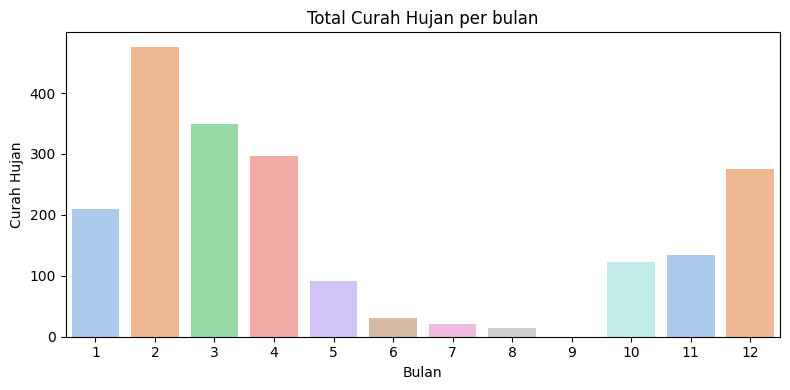

In [13]:
dff = data.groupby (["Bulan"]).CH.sum().reset_index()
plt.figure(figsize=(8,4), tight_layout=True)
ax = sns.barplot(x=dff["Bulan"], y=dff["CH"], palette='pastel', ci=None)
ax.set(title='Total Curah Hujan per bulan' , xlabel='Bulan', ylabel='Curah Hujan')
plt.show()

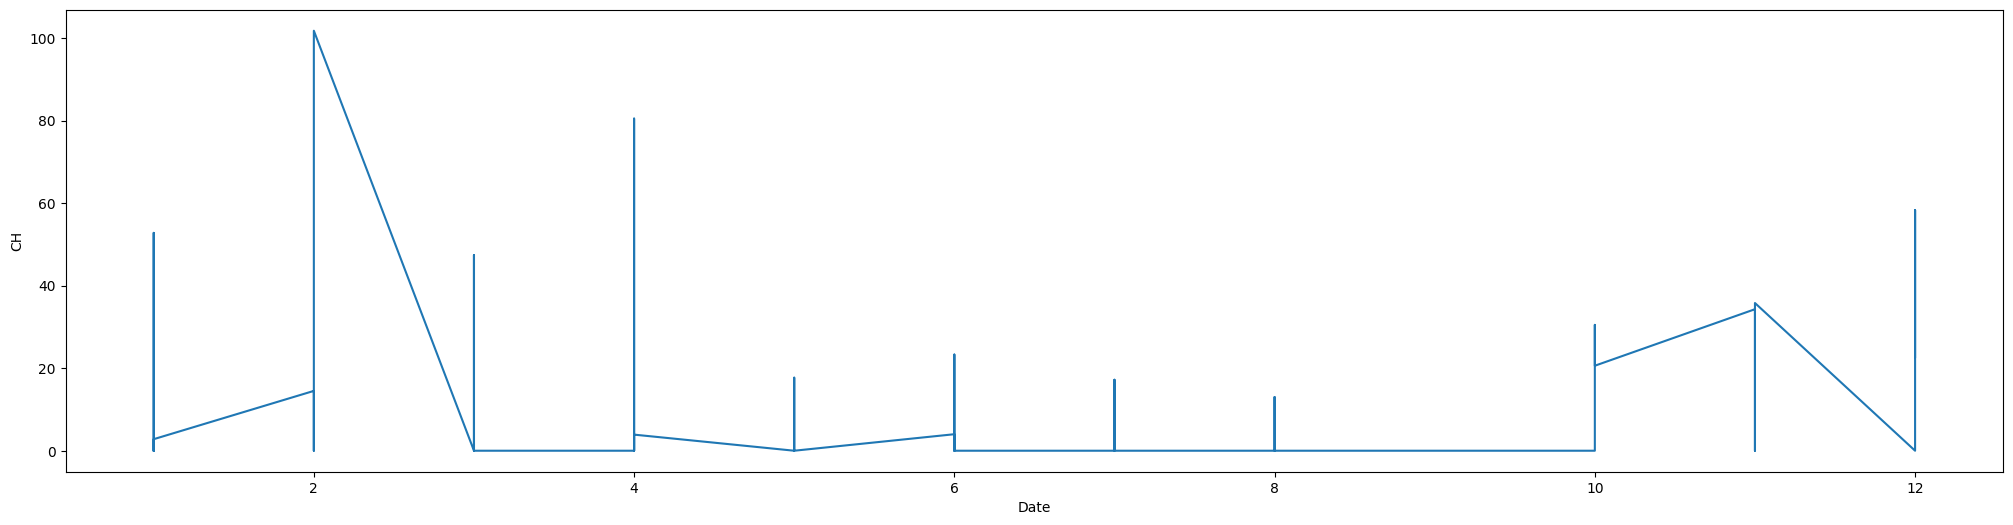

In [14]:
# Timeseries plot Tahun 2021

plt.figure(figsize=(25,6))
plt.plot(data['Bulan'], data['CH'])
plt.xlabel('Date')
plt.ylabel('CH')
plt.show()

In [15]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np

scaler = MinMaxScaler()
data[['temp_avg', 'humid_avg', 'CH']] = scaler.fit_transform(data[['temp_avg', 'humid_avg', 'CH']])

In [16]:
data['ch_besok'] = data['CH'].shift(-1)

In [17]:
# Hapus baris terakhir yang memiliki NaN
data = data.iloc[:-1].copy()

In [18]:
data = data.dropna(subset=['ch_besok']).copy()

In [19]:
data

,Bulan,tgl,temp_avg,CH,humid_avg,ch_besok
0,1,1.0,0.464286,0.000098,0.533333,0.012770
1,1,2.0,0.500000,0.012770,0.500000,0.000000
2,1,3.0,0.446429,0.000000,0.600000,0.017682
3,1,4.0,0.392857,0.017682,0.633333,0.012770
4,1,5.0,0.446429,0.012770,0.600000,0.161100
...,...,...,...,...,...,...
354,12,26.0,0.517857,0.000098,0.500000,0.009823
355,12,27.0,0.535714,0.009823,0.500000,0.250491
356,12,28.0,0.410714,0.250491,0.633333,0.572692
357,12,29.0,0.428571,0.572692,0.733333,0.327112


In [20]:
feature = data[['temp_avg', 'humid_avg']]
target = data['ch_besok']

In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(feature, target, test_size=0.2, random_state=42)

In [22]:
timesteps = 5

def create_sequences(data, target, timesteps=5):
    X_seq, y_seq = [], []
    for i in range(len(data) - timesteps):
        X_seq.append(data.iloc[i:i+timesteps].values)  # Menggunakan iloc untuk akses data dengan benar
        y_seq.append(target.iloc[i+timesteps])  # Menggunakan iloc untuk akses target dengan benar
    return np.array(X_seq), np.array(y_seq)

X_seq, y_seq = create_sequences(X_train, y_train, timesteps=timesteps)

In [23]:
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping

# Pastikan X_seq adalah array NumPy
X_seq = np.array(X_seq)
y_seq = np.array(y_seq)

# Hyperparameter
units = 64
dropout_rate = 0.2
learning_rate = 0.001
epochs = 50
batch_size = 32

# Model LSTM
model = Sequential()
model.add(LSTM(units, activation='relu', input_shape=(timesteps, X_seq.shape[2])))
model.add(Dropout(dropout_rate))
model.add(Dense(1))  # Output layer

# Optimizer
optimizer = Adam(learning_rate=learning_rate)

# Compile model
model.compile(optimizer=optimizer, loss='mse')

# Callback for early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Melatih model
history = model.fit(
    X_seq, y_seq,
    epochs=epochs,
    batch_size=batch_size,
    validation_split=0.2,
)


2024-12-31 06:14:42.227225: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 4s 61ms/step - loss: 0.0162 - val_loss: 0.0310
Epoch 2/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0128 - val_loss: 0.0310
Epoch 3/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0130 - val_loss: 0.0315
Epoch 4/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0132 - val_loss: 0.0307
Epoch 5/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0118 - val_loss: 0.0306
Epoch 6/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0128 - val_loss: 0.0307
Epoch 7/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0105 - val_loss: 0.0306
Epoch 8/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0101 - val_loss: 0.0308
Epoch 9/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0128 - val_loss: 0.0310
Epoch 10/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0124 - val_loss: 0.0308
Epoch 11/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0096 - val_loss: 0.0306
Epoch 12/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0126 - val_loss: 0.0306
E